In [1]:
include("/Users/forets/Projects/ReachabilityBenchmarks/models/ARCH/AFF/Platooning/Platooning.jl")

┌ Info: Recompiling stale cache file /Users/forets/.julia/compiled/v1.1/Reachability/CHV4V.ji for Reachability [774a0091-654f-5c65-bbdc-ad5b67b45832]
└ @ Base loading.jl:1184


run_platooning (generic function with 1 method)

In [2]:
PLAD01_BND42, options_PLAD01_BND42 =
    platooning(; deterministic_switching=true, time_horizon=20.,
                 allowed_distance=42.)
PLAD01_BND30, options_PLAD01_BND30 =
    platooning(; deterministic_switching=true, time_horizon=20.,
                 allowed_distance=30.)
PLAN01_UNB50, options_PLAN01_UNB50 =
    platooning(; deterministic_switching=true, time_horizon=Inf,
                 allowed_distance=50.);

In [4]:
# algorithm-specific options
options_PLAD01_BND42[:mode] = "check"
options_PLAD01_BND30[:mode] = "check"
options_PLAN01_UNB50[:mode] = "check"

𝑂_common = Options(:partition => [1:10])
𝑂_dense_options_PLAD01_BND42 = merge(𝑂_common, Options(:δ => 0.01))
𝑂_dense_options_PLAD01_BND30 = merge(𝑂_common, Options(:δ => 0.00001))
𝑂_dense_options_PLAN01_UNB50 = merge(𝑂_common, Options(:δ => 0.03))
𝑂_discrete = merge(𝑂_common, Options(:discretization => "nobloating", :δ => 0.1))

opC_dense_PLAD01_BND42 = BFFPSV18(𝑂_dense_options_PLAD01_BND42)
opC_dense_PLAD01_BND30 = BFFPSV18(𝑂_dense_options_PLAD01_BND30)
opC_dense_PLAN01_UNB50 = BFFPSV18(𝑂_dense_options_PLAN01_UNB50)
opC_discrete = BFFPSV18(𝑂_discrete)
opD = LazyDiscretePost(:lazy_R⋂I => true, :lazy_R⋂G => false)

[warn | Reachability]: Several option aliases were used for aliases Symbol[:lazy_R⋂I].
[warn | Reachability]: Several option aliases were used for aliases Symbol[:lazy_R⋂G].


LazyDiscretePost(Options(Dict{Symbol,Any}(:lazy_A⌜R⋂G⌟=>true,:check_invariant_intersection=>false,:lazy_A⌜R⋂G⌟⋂I=>true,:lazy_R⋂I=>true,:lazy_R⋂G=>false,:overapproximation=>Hyperrectangle,:combine_invariant_guard=>true)))

In [18]:
# single run to verify that specification holds
res = solve(PLAD01_BND42, options_PLAD01_BND42, opC_dense_PLAD01_BND42, opD)
@assert res.satisfied
res = solve(PLAD01_BND42, options_PLAD01_BND42, opC_discrete, opD)
@assert res.satisfied
# res = solve(PLAD01_BND30, options_PLAD01_BND30, opC_dense_PLAD01_BND30, opD)
# @assert res.satisfied
# res = solve(PLAD01_BND30, options_PLAD01_BND30, opC_discrete, opD)
# @assert res.satisfied
res = solve(PLAN01_UNB50, options_PLAN01_UNB50, opC_dense_PLAN01_UNB50, opD)
@assert res.satisfied
res = solve(PLAN01_UNB50, options_PLAN01_UNB50, opC_discrete, opD)
@assert res.satisfied

ErrorException: type ReachSolution has no field satisfied

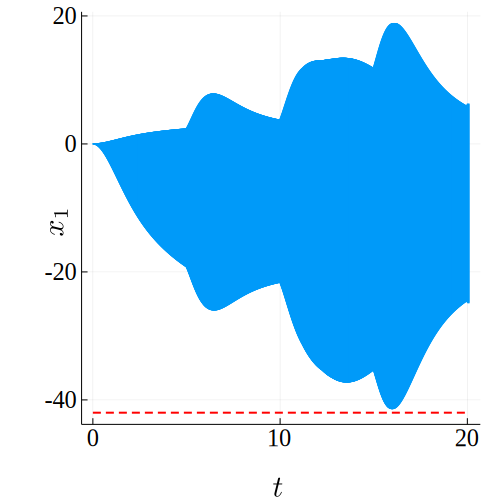

In [19]:
using Plots, Plots.PlotMeasures, LaTeXStrings

# ==============================================================================
# Create plots
# ==============================================================================

function plot_dashed_line!(v, time_horizon=20.)
    plot!(x->x, x->v, 0.0, time_horizon, line=2, color="red", linestyle=:dash,
          legend=nothing)
end

options_PLAD01_BND42[:mode] = "reach"
options_PLAD01_BND42[:plot_vars] = [0, 1]
options_PLAD01_BND42[:project_reachset] = true
res = solve(PLAD01_BND42, options_PLAD01_BND42, opC_dense_PLAD01_BND42, opD)
plot(res,
     tickfont=font(15, "Times"), guidefontsize=20,
     xlab=L"t\raisebox{-0.5mm}{\textcolor{white}{.}}",
     ylab=L"x_1\raisebox{2mm}{\textcolor{white}{.}}",
     xtick=[0., 10., 20.], ytick=[-40., -20., 0., 20.],
     bottom_margin=6mm, left_margin=2mm,
     size=(500, 500))
plot_dashed_line!(-42.)

In [20]:
options_PLAN01_UNB50[:mode] = "reach"
options_PLAN01_UNB50[:plot_vars] = [0, 1]
options_PLAN01_UNB50[:project_reachset] = true
res = solve(PLAN01_UNB50, options_PLAN01_UNB50, opC_dense_PLAN01_UNB50, opD)
time_horizon = res.Xk[end].t_start

288.8399999999997

In [21]:
plot(res,
     tickfont=font(15, "Times"), guidefontsize=20,
     xlab=L"t\raisebox{-0.5mm}{\textcolor{white}{.}}",
     ylab=L"x_1\raisebox{2mm}{\textcolor{white}{.}}",
     xtick=[0., 100., 200.], ytick=[-40., -20., 0., 20.],
     bottom_margin=6mm, left_margin=2mm,
     size=(500, 500))
plot_dashed_line!(-50., time_horizon)